# Introducrtion to Machine Learning: Assignment #2
## Submission date: 19\05\2025, 23:59.
### Topics:
- Linear Regression
- Perceptron
- Logistic Regression
- SVM

Submitted by:

 **Student 1 Name+ID

 **Student 2 Name+ID

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Question 1 - Linear Regression
You are requested to predict energy efficiency based on building attributes, such as wall area and glazing area.
The dataset consists of 8 continious features and **Two** outputs - Heat & Cool loadings.
You can read more about the dataset <a href='https://archive.ics.uci.edu/dataset/242/energy+efficiency'>here</a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Load data from https://sharon.srworkspace.com/ml/datasets/hw3/ENB2012_data.csv

In [ ]:
df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw3/ENB2012_data.csv')
df.head(3)

Divide the data into 85% train and 15% test with random_state=21.



In [ ]:
# Implement here

Define sklearn's linear regression, fit the train and save both train and test MSEs (by appending to results['Linear']). <br/>
DO NOT use "score" method of sklearn - we didn't learn about it and it does not measure MSE.

In [ ]:
results = {'Linear': [], 'Ridge': [], 'Lasso': []}

# Implement here

Show the correlation matrix of the train data. Should we do something?

In [ ]:
# Implement here

For both ridge and lasso, tune the best $\lambda$.
- For ridge, $\lambda\in \text{np.arange}(0.1, 1, 0.1)$.
- For lasso, $\lambda\in \text{np.logspace}(-4, -2, 20)$

For lasso, use `max_iter=5000`, as there is no close formula and convegence is not guranteeed.

In [ ]:
# pre-process data, if needed

######### RIDGE #########

alphas = np.arange(0.1, 1, 0.1)
mses_train = []
mses_test = []

# implement here

plt.figure(figsize=(12,12))

plt.subplot(221)
plt.plot(alphas, mses_train)
plt.title("train mse (ridge)")

plt.subplot(222)
plt.plot(alphas, mses_test)
plt.title("test mse (ridge)")

######### LASSO #########

alphas = np.logspace(-4, -2, 20)
mses_train = []
mses_test = []

# implement here

plt.subplot(223)
plt.plot(alphas, mses_train)
plt.title("train mse (lasso)")

plt.subplot(224)
plt.plot(alphas, mses_test)
plt.title("test mse (lasso)")

Unlike the theory, both methods give best results for a very small $\lambda$ and otherwise, big MSEs on both train and test. Look at the following:
- the coefficients of the original regression model.
- the mathematical relation between cov matrix and $X^\top X$, and determinant of both.

Use those to explain why larger values will only make things worse, even on the test.

<font color='red'>Write your answer here and explain it</font>

Print results from all three models (and use the best $\lambda$ from each model).
1. Explain the results and determine which model was be best.
2. What might be the cause to the values for searching given above? Why are the differences in the scales?

<font color='red'>Write your answers here and explain them</font>

In [ ]:
df = pd.DataFrame(results, columns=['Linear', 'Ridge', 'Lasso'], index=['train', 'test'])
print(df)

## Question 2 - Perceptron
You are given dataset for binary classification in 2D and aim to build the best Perceptron classifier.

import libraries

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

In [125]:
# Load numpy file function
def load_npy_file(url):
    response = requests.get(url)
    if response.status_code == 200:
        return np.load(BytesIO(response.content), allow_pickle=True).item()
    return None

Load data and make sure labels are appropriate for the perceptron algorithm

In [126]:
# Load and preprocess data
data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw2/perceptron_data.npy')
X_train = data_dict['X_train']
y_train = data_dict['y_train']
X_test = data_dict['X_test']
y_test = data_dict['y_test']

# Convert labels to -1 and 1 if necessary
if set(np.unique(y_train)) == {0, 1}:
    y_train = 2 * y_train - 1
    y_test = 2 * y_test - 1

Implement the function `perceptron(data, labels, batch_size)` which gets the train data $X\in\mathbb{R}^{n\times d}$, labels and returns the weight vector learned by perceptron.

At each iteration, sample `batch_size` miscalssified samples and update the weights according to them.

You should return two values:
1. List of the losses from all the iterations over all the data. For example, if the loss was 10 and in the next iteration 5, return [10,5].
2. The weights w.

Demands:
- Do not use max_iterations bound here, but only gradient norm check.
- Use lr=0.05.

In [127]:
# Perceptron implementation
def perceptron(data, labels, batch_size):
    n, d = data.shape
    w, b, lr, losses = np.zeros(d), 0, 0.05, []
    while True:
        preds = data @ w + b
        misclassified = np.where(labels * preds <= 0)[0]
        loss = len(misclassified)
        losses.append(loss)
        if loss == 0:
            break
        batch_idx = np.random.choice(misclassified, min(batch_size, loss), replace=False)
        delta_w = lr * (labels[batch_idx, np.newaxis] * data[batch_idx]).sum(axis=0)
        delta_b = lr * labels[batch_idx].sum()
        w += delta_w
        b += delta_b
    return losses, w, b

In [128]:
def plot(data, labels, w, bias):
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    m, b_line = -w[0] / w[1], -bias / w[1]
    x = np.arange(0.2, 0.8, 0.1)
    plt.plot(x, m * x + b_line)
    preds = np.sign(data @ w + bias)
    acc = np.mean(preds == labels)
    plt.title(f"Accuracy on data is {acc:.4f}")
    plt.show()

Train the perceptron model and call the plot func' on the <u>train</u>
dataset. It prints the accurcay as the graph's title.
1. What is your conclusion about this data?
2. How would SVM react to such data? Will it perform better?

<font color='red'>Write here your answers and explain them.</font>

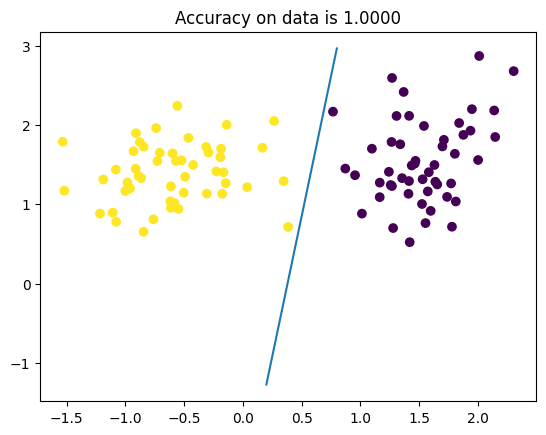

In [129]:
# Train with batch_size=1 and plot
losses, w, b = perceptron(X_train, y_train, batch_size=1)
plot(X_train, y_train, w, b)

Repeat the same training as above, but using batch_size=1,10,50,100.

Plot all the graphs and compare them. In addition, what is your optimal batch_size for this problem? why?

<font color='red'>Write here your answers and explain them.</font>

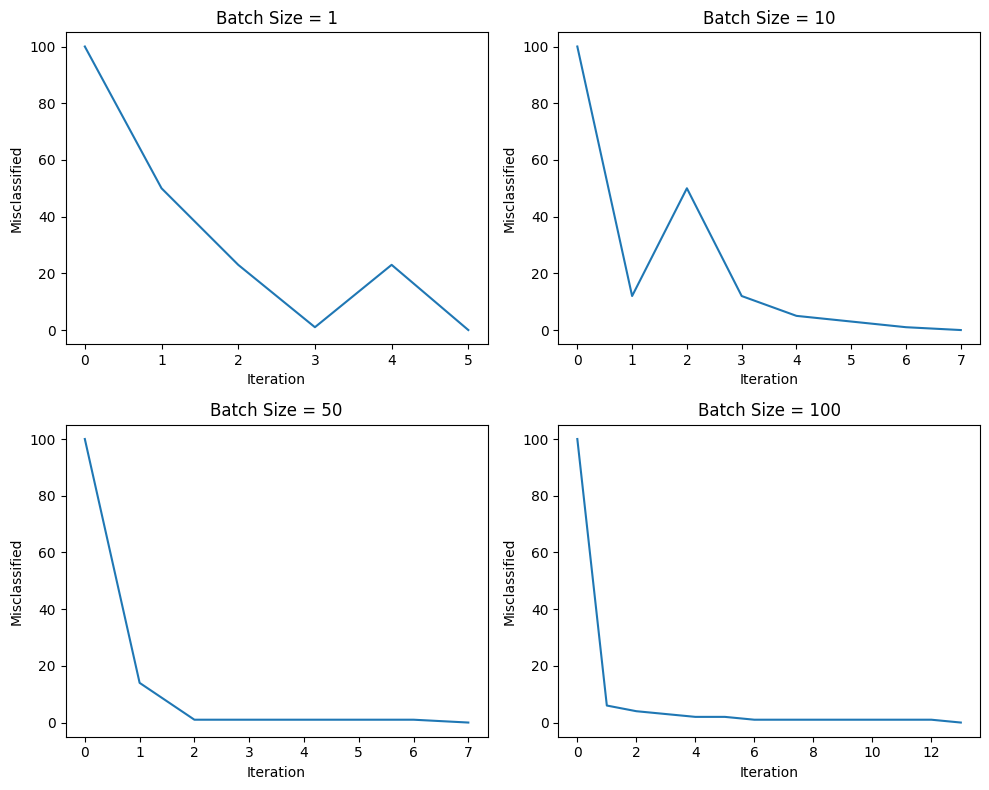

In [132]:
# Compare batch sizes
batch_sizes = [1, 10, 50, 100]
plt.figure(figsize=(10, 8))
for i, batch_size in enumerate(batch_sizes, 1):
    losses, w, b = perceptron(X_train, y_train, batch_size)
    #plot(X_train, y_train, w, b)
    plt.subplot(2, 2, i)
    plt.plot(losses)
    plt.title(f'Batch Size = {batch_size}')
    plt.xlabel('Iteration')
    plt.ylabel('Misclassified')
plt.tight_layout()
plt.show()

Using the optimal batch_size you specified, print the final test accuracy.

In [151]:
# Test accuracy with optimal batch_size
optimal_batch_size = 10
losses, w, b = perceptron(X_train, y_train, optimal_batch_size)
preds_test = np.sign(X_test @ w + b)
test_acc = np.mean(preds_test == y_test)
print(f"Test accuracy with batch_size={optimal_batch_size}: {test_acc * 100:.2f}%")

Test accuracy with batch_size=10: 95.00%


## Question 3 - Logistic regression

In this section you will build a classifier on a "toy" problem - Based on two grades, we determine if student passes the course or not.

import libraries and load dataset

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv(
    'https://sharon.srworkspace.com/ml/datasets/hw2/exams2.csv',
    header=None, names=['grade1', 'grade2', 'pass']
)


Preprocess the data:
1. Convert dataset to numpy, make sure classes are {0,1}.
2. The grades are discrete values between 0-100. Make them continious by adding a noise $ϵ_i\sim\mathcal{N}(0,1)$ for each data point.

3. Split to temp & test (80-20, stratify, random_state=42)
4. Split the temp to train & validation (80-20, stratify, random_state=42)
5. Scale the data

In [158]:
# Preprocess
X = df[['grade1', 'grade2']].to_numpy(dtype=float)
y = df['pass'].to_numpy().astype(int)
# Add Gaussian noise
X += np.random.randn(*X.shape)

# Split: temp+test (80/20)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# Split temp: train+val (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42
)

# Scale features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)


Implement the function `Logistic_Regression_via_GD(X, y, lr)`:
-	Input: the training data $X\in\mathbb{R}^{n\times d}$, a label vector $y\in\{0,1\}^n$ and learning rate parameter ‘lr’.
-	Output: The function computes the output vector ‘w’ (and ‘b’) which minimzes the logistic regression cost function on ‘X’ and ‘y’. <br/>

It should be done by implementing Gradient descent (with ‘lr’ as the learning rate) to solve logistic regression. Also, make sure to not run more than 3000 iterations. <br/>

Tip: The gradients may be large, you can use $\frac{1}{n}\nabla{L}$ (which is the true empirical loss' gradient)

In [159]:
# Logistic Regression implementation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def Logistic_Regression_via_GD(X, y, lr, lamda=0):
    n, d = X.shape
    w, b = np.zeros(d), 0
    for _ in range(3000):
        preds = sigmoid(X @ w + b)
        error = preds - y
        grad_w = (X.T @ error) / n + lamda * np.sign(w)
        grad_b = error.mean()
        w -= lr * grad_w
        b -= lr * grad_b
    return w, b

The function 'predict' is already implemented for you. It gives a classification for a new sample (x) based on the sign of $w^\top x + b$. <br/>
The function currently returns {-1,+1}. <u>Modify this</u> to {0,1}

In [160]:
def predict(w, b, x):
    return (x @ w + b >= 0).astype(int)

Call `Logistic_Regression_via_GD(X,y,lr)`, where ‘X’ and ‘y’ are the training data and the corresponding labels. Use lr of 0.1 and print the accuracy on the test set.

In [161]:
# Train and evaluate without regularization
w, b = Logistic_Regression_via_GD(X_train, y_train, lr=0.1)
preds_test = predict(w, b, X_test)
accuracy = np.mean(preds_test == y_test)
print(f"Test accuracy is {accuracy * 100:.2f}%")

Test accuracy is 95.00%


Visualize the test data. As for now, it shows the scaled data.<br/>
Show the data and line of the original data ranges (x,y ranges in [0,100]).

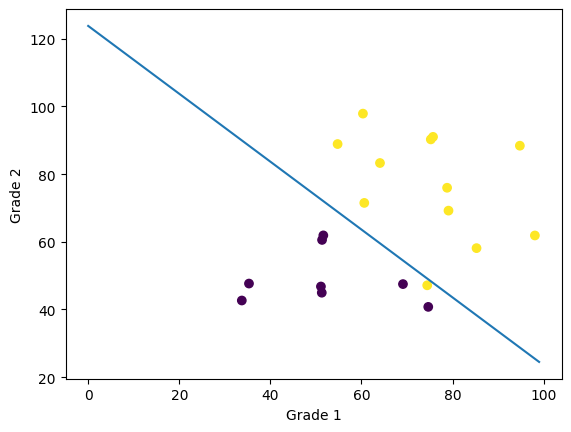

In [162]:
# Plot test data in original scale
def plot(data, labels, w, b, scaler):
    # Adjust w and b for original scale
    w_plot = w / scaler.scale_
    b_plot = b - (w / scaler.scale_) @ scaler.mean_
    data_orig = scaler.inverse_transform(data)
    plt.scatter(data_orig[:, 0], data_orig[:, 1], c=labels)
    m, b_line = -w_plot[0] / w_plot[1], -b_plot / w_plot[1]
    x = np.arange(0, 100, 1)
    plt.plot(x, m * x + b_line)
    plt.xlabel('Grade 1')
    plt.ylabel('Grade 2')
    plt.show()

plot(X_test, y_test, w, b, scaler)

We now want to upgrade our model and add a regularization term. The loss will be

$$
L'=L+\lambda ||w||_1
$$

Adjust the implementation of `Logistic_Regression_via_GD` accordingly and add a hyperparameter named 'lamda'.

Plot a graph of the accuracy on the validation set as function of lamda. The range is up to your choice, but dont use a larger value than 2.

In [164]:

best_lambda = lambdas[np.argmax(val_accs)]
print(f"Best λ: {best_lambda:.1f}")
w, b = Logistic_Regression_via_GD(X_train, y_train, lr=0.1, lamda=best_lambda)
preds_test = predict(w, b, X_test)
test_acc = np.mean(preds_test == y_test)
print(f"Test accuracy with best λ: {test_acc * 100:.2f}%")

Best λ: 0.0
Test accuracy with best λ: 95.00%


Using the best $\lambda$ obtained from your work, print the final test accuracy.

Answer the following questions:
1. Did we need lambda? Try to justify why the lambda you found is the best.
2. Generally speaking, when using the validation for tuning the best hyperparameter, is it guranteed it will be also the best for the test? Explain and show an example.

<font color='red'>Write your answers here, with an explaination as requested</font>

## Question 4 - SVM

Answer those questions here (in color) or in pdf

### First section

We will change the algorithm for Hard SVM by learning only from the samples with positive labels and ignoring samples with negative labelings. Hence, the optimization problem becomes:

$$\min \frac{1}{2}||w||^2\\
\text{s.t.} \forall i\in J_+, w^\top x_i+b\geq 1
$$

As $J_+$ is the set of positive labeled samples indexes.

a. Under the settings above, what will be the solution of w? Justify.
b. If we set b=0, meaning we remain only with $w^\top x_i\geq 1$, what is $\min_{i\in J_+} w^\top x_i?$

c. Let $w^*$ be the solution to the problem (b=0). We will classify new samples as:

$$
\hat{y}=\begin{cases}
1 & w^\top x\geq \min_{i\in J^+} w^\top x_i-ɛ \\
-1 & \text{otherwise}
\end{cases}
$$

For some small $ε>0$. Will this condition classify correctly all the training samples, both positive and negative? Justify

### Second section

Consider three distinct points $x_1,x_2∈R^d$ with labels $y_1=1, y_2=-1$.
Compute the hyperplane that Hard SVM will return on this data, i.e., give explicit expressions for w and b as functions of x1, x2.
Hint: convert the primal problem to the dual one and reduce it to a one variable problem.


### Third section

We define the SHOR loss function of finding linear seperators:

$$
L=\sum_{i=1}^n y_i*COST_0(\theta^\top x_i)+(1-y_i)*COST_1(\theta^\top x_i)
$$

Where:

<img src="https://srworkspace.com/sharon/ml/datasets/cost.png"/>

This loss will be zero if exactly two conditions hold true. Which two conditions gurantee this? Explain!

(i) For every sample with y_i=1, we have that $\theta^\top x_i\geq 0$

(ii) For every sample with y_i=0, we have that $\theta^\top x_i\leq 0$

(iii) For every sample with y_i=1, we have that $\theta^\top x_i\geq -1$

(iv) For every sample with y_i=1, we have that $\theta^\top x_i\geq 1$

## Question 5 - Bonus 8 pts

Recall the house prices dataset you have seen in class.
In this question, you will use another loss.

$$
L=\frac{1}{n}||Xw-y||_1=\frac{1}{n}\sum_{i=1}^n |w^\top x_i-y_i|
$$
This loss is more robust to outliers, since outliers affect linearly and not squared. However, w that minimizes this loss has no closed formula.

Implement here everything from scratch. Do not use an existing model to minimize the loss. Try to reach the best model you can

**Report** in your results: train and test results, plots, tuning (if you choose to), including any evidence your solution is good enough <br/>
<font color='red'>Report here about your choices and reasons (dealing with data, optimization methods)</font>


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/Toronto_rentals.csv')

X = data.iloc[:, :3].to_numpy()  # Bedroom, bathroom, den
y = data.iloc[:, -1].str.replace(r'[^\\d.]', '', regex=True).astype('float').to_numpy()  # Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

ValueError: could not convert string to float: '.'

In [35]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def subgradient_descent(X, y, eta=0.01, max_iterations=10000, threshold=1e-5):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    losses = []
    
    for _ in range(max_iterations):
        y_pred = np.dot(X, w) + b
        residuals = y_pred - y
        loss = np.mean(np.abs(residuals))
        losses.append(loss)
        
        signs = np.sign(residuals)
        dw = (1 / n_samples) * np.dot(X.T, signs)
        db = (1 / n_samples) * np.sum(signs)
        
        w -= eta * dw
        b -= eta * db
        
        if np.linalg.norm(dw) < threshold:
            break
    
    return w, b, losses

def l1_loss(X, y, w, b):
    y_pred = np.dot(X, w) + b
    return np.mean(np.abs(y_pred - y))

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
w, b, losses = subgradient_descent(X_train_scaled, y_train)

# Evaluate
train_loss = l1_loss(X_train_scaled, y_train, w, b)
test_loss = l1_loss(X_test_scaled, y_test, w, b)
print(f"Train L1 loss: {train_loss}")
print(f"Test L1 loss: {test_loss}")

Train L1 loss: 0.26656327257047707
Test L1 loss: 0.22826171244496996


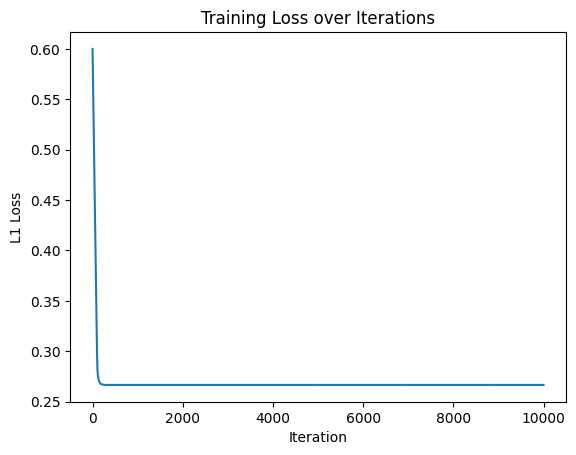

In [36]:
import matplotlib.pyplot as plt

# Assuming losses is available from subgradient_descent
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('L1 Loss')
plt.title('Training Loss over Iterations')
plt.savefig('l1_training_loss.png')